In [2]:
import numpy as np
import pandas as pd

# data preprocessing

In [7]:
df= pd.read_csv('new_df.csv')
df.head(10)

,Unnamed: 0,beer_id,username,look,smell,taste,feel,overall,score
0,0,271781,bluejacket74,4.00,4.00,4.00,4.25,4.00,4.03
1,9449,78043,bluejacket74,3.50,4.00,3.50,3.50,3.50,3.62
2,10982,225791,bluejacket74,4.25,4.00,4.00,3.75,4.00,3.99
3,17441,77030,bluejacket74,3.50,3.75,4.00,3.75,3.75,3.84
4,18672,47658,bluejacket74,4.50,5.00,5.00,5.00,5.00,4.97
5,24035,47678,bluejacket74,4.00,4.00,4.00,3.50,3.50,3.85
6,25282,90017,bluejacket74,4.00,4.25,4.25,4.00,4.25,4.21
7,25470,47694,bluejacket74,3.50,3.50,3.50,3.50,3.50,3.50
8,25759,270612,bluejacket74,4.00,4.00,4.25,4.00,4.00,4.10
9,26894,96731,bluejacket74,3.00,4.00,4.25,3.75,4.00,4.02


In [12]:
df.corr()

,Unnamed: 0,beer_id,look,smell,taste,feel,overall,score
Unnamed: 0,1.000000,0.143442,0.027066,0.043075,0.028102,0.031381,0.021502,0.033490
beer_id,0.143442,1.000000,0.137813,0.175016,0.140582,0.155871,0.128143,0.161649
look,0.027066,0.137813,1.000000,0.657355,0.638100,0.666092,0.651957,0.727322
smell,0.043075,0.175016,0.657355,1.000000,0.785222,0.712775,0.764742,0.891306
taste,0.028102,0.140582,0.638100,0.785222,1.000000,0.799428,0.880663,0.964768
feel,0.031381,0.155871,0.666092,0.712775,0.799428,1.000000,0.806712,0.863239
overall,0.021502,0.128143,0.651957,0.764742,0.880663,0.806712,1.000000,0.933296
score,0.033490,0.161649,0.727322,0.891306,0.964768,0.863239,0.933296,1.000000


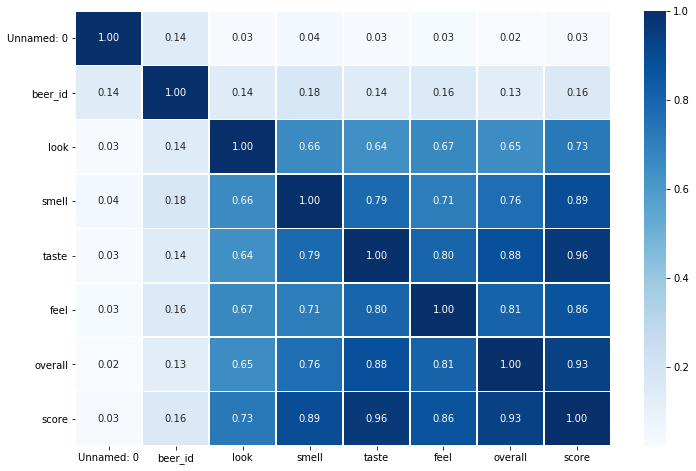

In [16]:
%matplotlib inline  
 #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(12,8))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 전반적으로 'score'라는 변수가 다른 4개의 변수(look, smell, taste, feel)와 상관성이 높게 나왔으므로,
- 우리는 'score'를 'rating'변수로 사용하고자 함.

In [17]:
#그렇다면, 필요한 컬럼만 남기고 전처리
col=['beer_id','username','score']
new_df=df[col]
new_df.head()

,beer_id,username,score
0,271781,bluejacket74,4.03
1,78043,bluejacket74,3.62
2,225791,bluejacket74,3.99
3,77030,bluejacket74,3.84
4,47658,bluejacket74,4.97


In [18]:
#컬럼 이름 rename
df2=new_df.rename(index=str, columns={'beer_id':'beer','username':'user','score':'rating'})
df2.head()

,beer,user,rating
0,271781,bluejacket74,4.03
1,78043,bluejacket74,3.62
2,225791,bluejacket74,3.99
3,77030,bluejacket74,3.84
4,47658,bluejacket74,4.97


In [20]:
df2.shape
#440만개의 데이터, 너무 많으므로 10만개 안쪽으로 전처리하고자 함.

(4403885, 3)

In [24]:
print(df2.rating.min())
print(df2.rating.max())
#df2의 'rating' 컬럼은 최소 1점, 최대 5점을 갖는 평점이다.

1.0
5.0


In [26]:
#원 데이터: user가 100개 이상인 것만 전처리됨
df2.user.value_counts()[-10:]

mwrseeley        100
Tinfang          100
skillerified     100
joshstevens87    100
chiefydawg       100
Chambic          100
sbuck            100
bccrosley        100
Drewcifer        100
jwwjd            100
Name: user, dtype: int64

In [27]:
#원 데이터: beer가 1인 것들이 많음.
df2.beer.value_counts()

11757     4102
19960     4037
1093      3818
17112     3752
2093      3584
10672     3577
412       3552
29619     3428
89174     3401
7971      3389
1904      3263
34483     3122
88        3103
276       3031
1708      3019
2671      2934
645       2929
92        2904
34        2902
731       2847
30420     2845
15881     2807
104       2759
1160      2745
16814     2743
680       2698
48505     2693
35036     2646
3833      2642
34420     2641
          ... 
112517       1
117689       1
141746       1
70118        1
131463       1
139651       1
361931       1
165859       1
80806        1
94696        1
88540        1
68512        1
132412       1
120134       1
83284        1
71006        1
373104       1
119295       1
59311        1
97541        1
125617       1
128323       1
120135       1
99661        1
138903       1
83285        1
138179       1
117198       1
125386       1
97992        1
Name: beer, Length: 154711, dtype: int64

- 원래 user의 value_counts가 100개 이상인 것(즉, 리뷰 100개 이상의 리뷰를 남긴 유저)만 남기고 전처리를 했었는데, 
- 그래도 데이터의 수가 너무 많으므로 리뷰의 수가 100 or 1000개 이상인 beer 만 남기도록 하자.

In [60]:
#beer로 그룹바이를 했을 때, 각 beer_id 마다의 user수
con = df2.groupby('beer')[['user']].count()>100
con = con.reset_index()

list_beer = con[con.user==True].beer.tolist()
len(list_beer)

7798

In [63]:
new_df = df2[df2['beer'].isin(list_beer)]
len(new_df)

2725965

In [68]:
#beer로 그룹바이를 했을 때, 각 beer_id 마다의 user수
con = df2.groupby('beer')[['user']].count()>1000
con = con.reset_index()

list_beer = con[con.user==True].beer.tolist()
len(list_beer)

481

In [69]:
new_df = df2[df2['beer'].isin(list_beer)]
len(new_df)

761681

In [70]:
new_df.head()

,beer,user,rating
4,47658,bluejacket74,4.97
19,66674,bluejacket74,4.04
25,48824,bluejacket74,3.71
37,55939,bluejacket74,4.10
62,68916,bluejacket74,4.34


In [ ]:
#이렇게 beer로 그룹바이 시, 리뷰 수가 1000개 이상인 beer만 추출 : 76만개

In [80]:
#user로 그룹바이를 했을 때, 각 beer_id 마다의 user수
con2 = new_df.groupby('user')[['beer']].count()   
con2 = con2.reset_index()

con2.beer.max() #앞에서 beer 전처리를 하면서, user의 리뷰 수의 최댓값이 460개가 돼버림. 

460

In [88]:
con3 = new_df.groupby('user')[['beer']].count() >250 #그래서 user 리뷰 수를 250개로 줄였음.
con3 = con3.reset_index()

con3

,user,beer
0,-DF-,False
1,-Rick,False
2,-chii-,False
3,-steve-,False
4,0110x011,False
5,03fatboy,False
6,05Harley,False
7,1000lbgrizzly,False
8,100floods,False
9,10Crumra,False


In [89]:
list_user = con3[con3.beer==True].user.tolist()
len(list_user)

333

In [90]:
new_df2 = new_df[new_df['user'].isin(list_user)]
len(new_df2) #최종 전처리 결과, 10만개. 

101889

In [92]:
#최종 전처리된 df
new_df2.head(20)

,beer,user,rating
4,47658,bluejacket74,4.97
19,66674,bluejacket74,4.04
25,48824,bluejacket74,3.71
37,55939,bluejacket74,4.10
62,68916,bluejacket74,4.34
73,74986,bluejacket74,4.42
77,76816,bluejacket74,4.00
162,178740,bluejacket74,3.77
211,142974,bluejacket74,4.00
227,5328,bluejacket74,3.48


In [97]:
len(new_df2.user.unique())

333

In [98]:
len(new_df2.beer.unique())

481

In [99]:
new_df2.to_csv('my_df.csv', index=False)